# Description of the dataset

Columns Description:
InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. Description: Product (item) name. Nominal. Quantity: The quantities of each product (item) per transaction. Numeric. InvoiceDate: Invoice date and time. Numeric. The day and time when a transaction was generated. UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£). CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. Country: Country name. Nominal. The name of the country where a customer resides.

# Objective

Our objective is to do a classification using 4 different techniques which are KNN algorithm, Decision Tree, Random Forest and XGBoost and we will finally evaluate which is the best technique for our data set.

In [141]:
#importing the necessary pacakages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [142]:
#reading the excel file
df=pd.read_excel("D:\PGDM\TERM-5\Python\Mid term assignment\Online Retail.xlsx")

# Exploratory data analysing and data pre-processing

In [143]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [144]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [145]:
df.size

4335272

There are 4335272 no of elements in the dataset.

In [146]:
df.shape

(541909, 8)

The dataset contains 541909 number of records
The dataset contains 8 number of features

In [147]:
#understanding the data types of the features
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Non null count is different across variables . Therefore it indicates there is presence of null values.

In [149]:
#statistical measures of the numerical columns
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


From the description we can see presence of negative values in Quantity and UnitPrice. Further we have to look into it.

In [150]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

dataframe has null or nan values in 'Description' and 'CustomerID'. CustomerID has so many null values and in our case not significant . Therefore dropping the column.

In [151]:
#Deleting the 'CustomerID' column
df1 = df.drop(columns=['CustomerID'])

In [152]:
df1[df1['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,United Kingdom


In 'Description' column we have NaN values . Further either we have to impute eith other values or for simplicity we can drop those records.

In [153]:
#Checking for duplicate values and removing those records from the dataframe.
print("Number of duplicates before cleaning:",df1.duplicated().sum())
df1 = df1.drop_duplicates(keep="first")
print("Number of duplicates after cleaning:",df1.duplicated().sum())

Number of duplicates before cleaning: 5268
Number of duplicates after cleaning: 0


In [154]:
print(df1.isna().sum())

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64


In [155]:
#Dropping the records with NaN values from the dataframe related to 
df1.dropna(subset="Description",axis=0,inplace=True)
print("Shape of data after removing NaN's Description",df1.shape)

Shape of data after removing NaN's Description (535187, 7)


In [160]:
df1.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [161]:
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [162]:
#creating a copy
df2=df1.copy()

# Feature engineering. Creating new columns

In [163]:
df2['Quantity'] = pd.to_numeric(df2['Quantity'])
df2['UnitPrice'] = pd.to_numeric(df2['UnitPrice'])
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])

In [164]:
df2['Month'] = df2['InvoiceDate'].dt.month_name()
df2['Da_Name'] = df2['InvoiceDate'].dt.day_name()
df2['Year'] = df2['InvoiceDate'].dt.year
df2['Time'] = df2['InvoiceDate'].dt.time
df2['Hour'] = df2['InvoiceDate'].dt.hour
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Month,Da_Name,Year,Time,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,December,Wednesday,2010,08:26:00,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,December,Wednesday,2010,08:26:00,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,December,Wednesday,2010,08:26:00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,December,Wednesday,2010,08:26:00,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,December,Wednesday,2010,08:26:00,8
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,December,Friday,2011,12:50:00,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,December,Friday,2011,12:50:00,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,December,Friday,2011,12:50:00,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,December,Friday,2011,12:50:00,12


In [165]:
# Creating a column named as UnitPrice
df2['Sales']=df2['Quantity']*df2['UnitPrice']
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Month,Da_Name,Year,Time,Hour,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,December,Wednesday,2010,08:26:00,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,December,Wednesday,2010,08:26:00,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,December,Wednesday,2010,08:26:00,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,December,Wednesday,2010,08:26:00,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,December,Wednesday,2010,08:26:00,8,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,December,Friday,2011,12:50:00,12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,December,Friday,2011,12:50:00,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,December,Friday,2011,12:50:00,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,December,Friday,2011,12:50:00,12,16.60


In [166]:
#randomly checking different index positions to find out is there any discrepency.
display(df2.iloc[[100,1000, 10000, 100000]])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Month,Da_Name,Year,Time,Hour,Sales
100,536378,84519A,TOMATO CHARLIE+LOLA COASTER SET,6,2010-12-01 09:37:00,2.95,United Kingdom,December,Wednesday,2010,09:37:00,9,17.70
1024,536522,21664,RIDGED GLASS STORAGE JAR CREAM LID,2,2010-12-01 12:49:00,3.75,United Kingdom,December,Wednesday,2010,12:49:00,12,7.50
10249,537237,20782,CAMOUFLAGE EAR MUFF HEADPHONES,4,2010-12-06 09:58:00,11.02,United Kingdom,December,Monday,2010,09:58:00,9,44.08
101225,544907,22585,PACK OF 6 BIRDY GIFT TAGS,12,2011-02-24 14:15:00,1.25,United Kingdom,February,Thursday,2011,14:15:00,14,15.00


In [167]:
df2[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,535187.000000,535187.000000
mean,9.671593,4.645242
std,219.059056,97.364810
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [168]:
df2[df2['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Month,Da_Name,Year,Time,Hour,Sales
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,United Kingdom,December,Wednesday,2010,09:41:00,9,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,United Kingdom,December,Wednesday,2010,09:49:00,9,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,United Kingdom,December,Wednesday,2010,10:24:00,10,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom,December,Wednesday,2010,10:24:00,10,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom,December,Wednesday,2010,10:24:00,10,-6.96


Here we can see there is some negative quantities possibly indicates the return of items. So the buy items will be canceled out by the return orders.

In [169]:
df2[df2['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Month,Da_Name,Year,Time,Hour,Sales
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,United Kingdom,August,Friday,2011,14:51:00,14,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,United Kingdom,August,Friday,2011,14:52:00,14,-11062.06


From the above output we can se there is a prescence of negative unitprice which is assocoated with adjustment of bad debt. It is better to drop those records.

In [170]:
df2 = df2.drop(index=[299983,299984])


In [171]:
print(df2[['Quantity','UnitPrice']].describe())

            Quantity      UnitPrice
count  535185.000000  535185.000000
mean        9.671626       4.686598
std       219.059465      94.985568
min    -80995.000000       0.000000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000


In [172]:
df2 = df2[df2['Quantity'] > 0]
print(df2[['Quantity','UnitPrice']].describe())

           Quantity      UnitPrice
count  525460.00000  525460.000000
mean       10.68106       3.918228
std       157.39957      36.073270
min         1.00000       0.000000
25%         1.00000       1.250000
50%         4.00000       2.080000
75%        11.00000       4.130000
max     80995.00000   13541.330000


In [173]:
df3=df2.copy()

In [174]:
df3.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'Country', 'Month', 'Da_Name', 'Year', 'Time', 'Hour',
       'Sales'],
      dtype='object')

In [175]:
df3=df3[['InvoiceNo','StockCode','Quantity','UnitPrice','Sales','Description','Country','InvoiceDate','Month', 'Da_Name', 'Year', 'Time', 'Hour']]
df3.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,Sales,Description,Country,InvoiceDate,Month,Da_Name,Year,Time,Hour
0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,2010-12-01 08:26:00,December,Wednesday,2010,08:26:00,8
1,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,United Kingdom,2010-12-01 08:26:00,December,Wednesday,2010,08:26:00,8
2,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,United Kingdom,2010-12-01 08:26:00,December,Wednesday,2010,08:26:00,8
3,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,2010-12-01 08:26:00,December,Wednesday,2010,08:26:00,8
4,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,2010-12-01 08:26:00,December,Wednesday,2010,08:26:00,8


# Performance measurement through graphs and tables

C:\Users\soupa\AppData\Local\Temp\ipykernel_16232\3224032820.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_wise_quantity = df3.groupby("Description").sum()['Quantity'].sort_values(ascending=False).reset_index()


,Description,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,78033
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
3,JUMBO BAG RED RETROSPOT,48375
4,WHITE HANGING HEART T-LIGHT HOLDER,37876
5,POPCORN HOLDER,36749
6,PACK OF 72 RETROSPOT CAKE CASES,36396
7,ASSORTED COLOUR BIRD ORNAMENT,36362
8,RABBIT NIGHT LIGHT,30739
9,MINI PAINT SET VINTAGE,26633


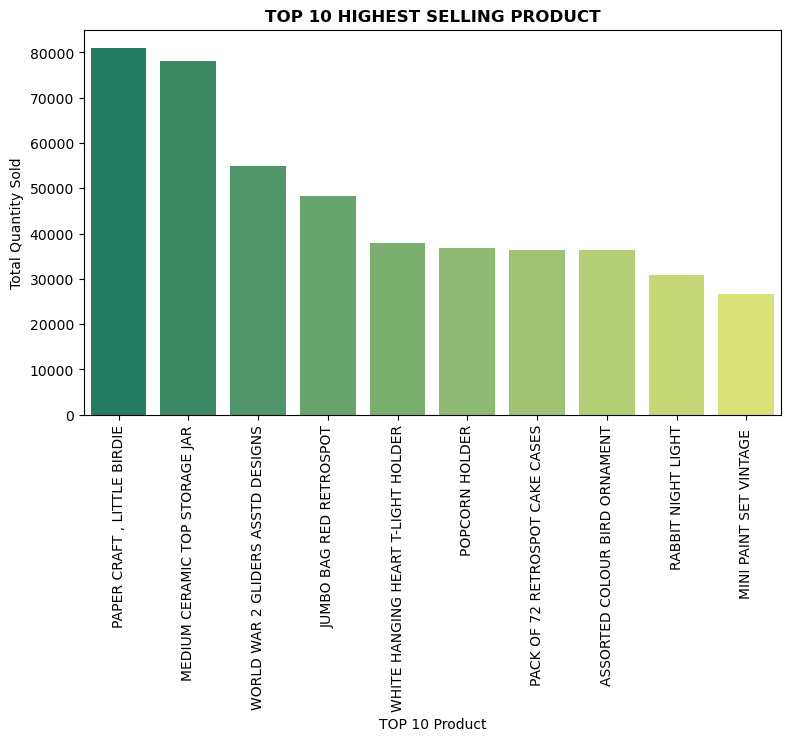

In [176]:
# Top 10 products with high number of quantity purchased
import matplotlib.pyplot as plt
import seaborn as sns

product_wise_quantity = df3.groupby("Description").sum()['Quantity'].sort_values(ascending=False).reset_index()

top_10 = product_wise_quantity.nlargest(10, 'Quantity')
display(top_10)

plt.figure(figsize=(9, 5))
sns.barplot(data=top_10, x='Description', y='Quantity', palette='summer')
plt.xlabel('TOP 10 Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.title('TOP 10 HIGHEST SELLING PRODUCT', fontweight='bold')
plt.show()



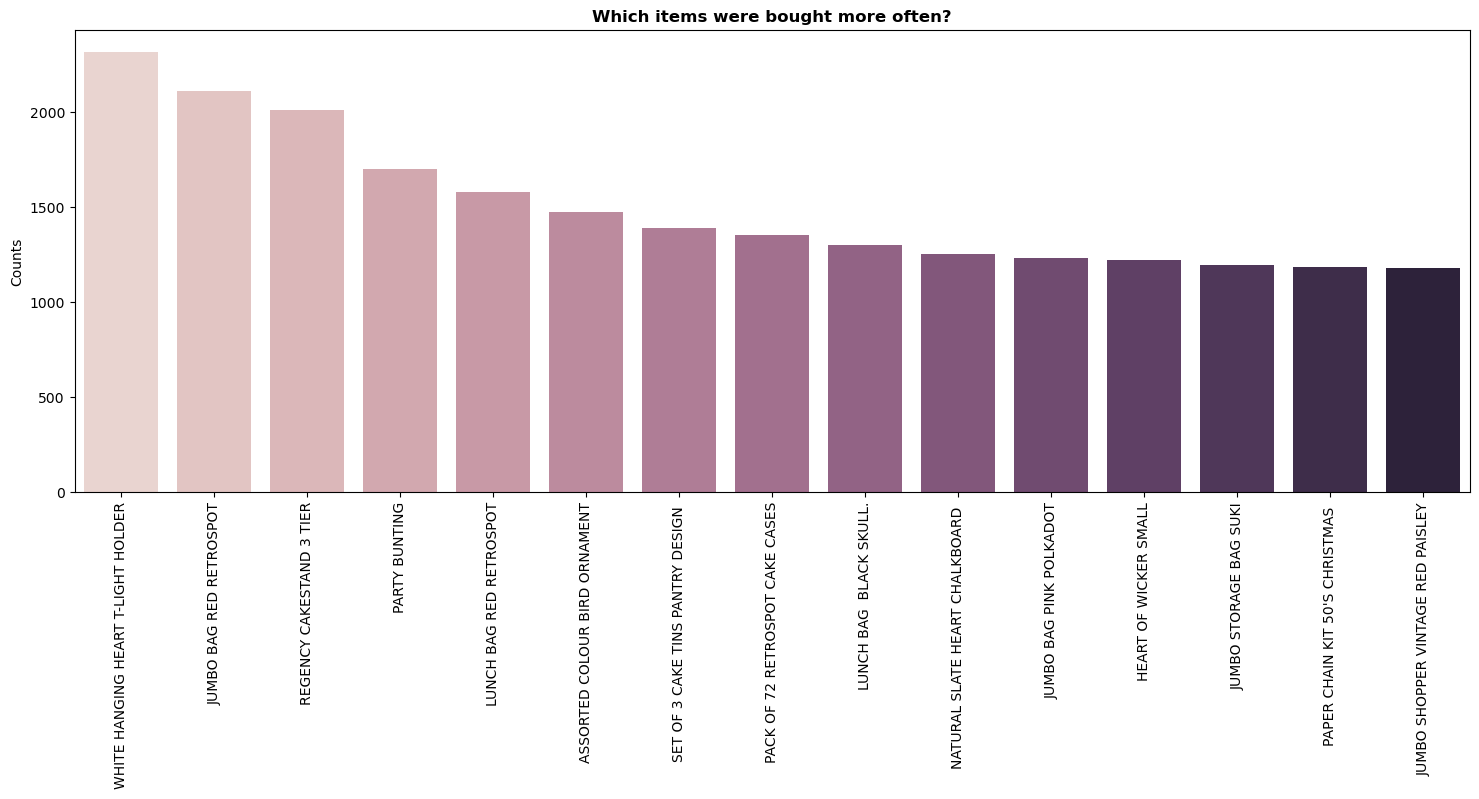

In [177]:
# Which items were bought more often?
item_counts = df3['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=item_counts.index, y=item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were bought more often?",fontweight='bold');
plt.xticks(rotation=90);

C:\Users\soupa\AppData\Local\Temp\ipykernel_16232\3044752047.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_wise_sales = df3.groupby("Country").sum()['Sales'].sort_values(ascending=False).reset_index()


,Country,Sales
0,United Kingdom,9001744.094
1,Netherlands,285446.340
2,EIRE,283140.520
3,Germany,228678.400
4,France,209625.370
5,Australia,138453.810
6,Spain,61558.560
7,Switzerland,57067.600
8,Belgium,41196.340
9,Sweden,38367.830


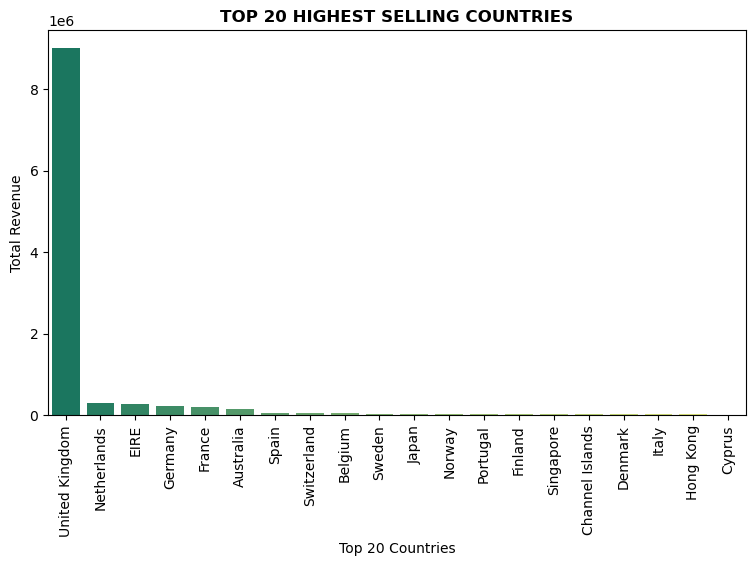

In [178]:
# Top 20 countries  with highest sales across all stock codes

country_wise_sales = df3.groupby("Country").sum()['Sales'].sort_values(ascending=False).reset_index()

top_20 = country_wise_sales.nlargest(20, 'Sales')
display(top_20)

plt.figure(figsize=(9, 5))
sns.barplot(data=top_20, x='Country', y='Sales', palette='summer')
plt.xlabel('Top 20 Countries')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.title('TOP 20 HIGHEST SELLING COUNTRIES', fontweight='bold')
plt.show()


C:\Users\soupa\AppData\Local\Temp\ipykernel_16232\2624727676.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_group = df3.groupby('Month').sum()['Sales'].reset_index()


,Month,Sales
0,April,536968.491
1,August,757841.380
2,December,1459243.060
3,February,522545.560
4,January,689811.610
5,July,718076.121
6,June,760547.010
7,March,716215.260
8,May,769296.610
9,November,1503866.780


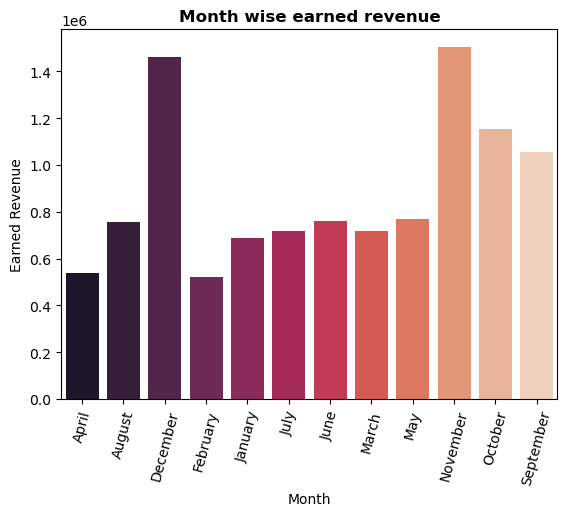

In [180]:
#Month wise sales report.
month_group = df3.groupby('Month').sum()['Sales'].reset_index()
display(month_group)
sns.barplot(data= month_group, x = month_group['Month'],y =month_group['Sales'],palette ='rocket')
plt.xlabel('Month')
plt.ylabel('Earned Revenue')
plt.xticks(rotation= 75)
plt.title('Month wise earned revenue',fontweight ='bold')
plt.show()

(array([0]), [Text(0, 0, 'United Kingdom')])

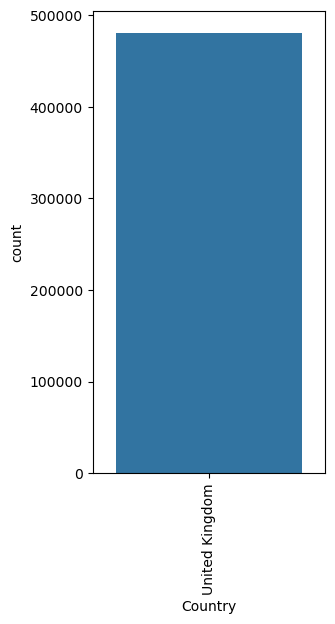

In [41]:
plt.figure(figsize=(3,6))
sns.countplot(x=df3[df3['Country'] == 'United Kingdom']['Country'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'France'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Netherlands'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'Norway'),
  Text(5, 0, 'EIRE'),
  Text(6, 0, 'Switzerland'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'Poland'),
  Text(9, 0, 'Portugal'),
  Text(10, 0, 'Italy'),
  Text(11, 0, 'Belgium'),
  Text(12, 0, 'Lithuania'),
  Text(13, 0, 'Japan'),
  Text(14, 0, 'Iceland'),
  Text(15, 0, 'Channel Islands'),
  Text(16, 0, 'Denmark'),
  Text(17, 0, 'Cyprus'),
  Text(18, 0, 'Sweden'),
  Text(19, 0, 'Finland'),
  Text(20, 0, 'Austria'),
  Text(21, 0, 'Bahrain'),
  Text(22, 0, 'Israel'),
  Text(23, 0, 'Greece'),
  Text(24, 0, 'Hong Kong'),
  Text(25, 0, 'Singapore'),
  Text(26, 0, 'Lebanon'),
  Text(27, 0, 'United Arab Emirates'),
  Text(28, 0, 'Saudi Arabia'),
  Text(29, 0, 'Czech Republic'),
  Text(30, 0, 'Canada'

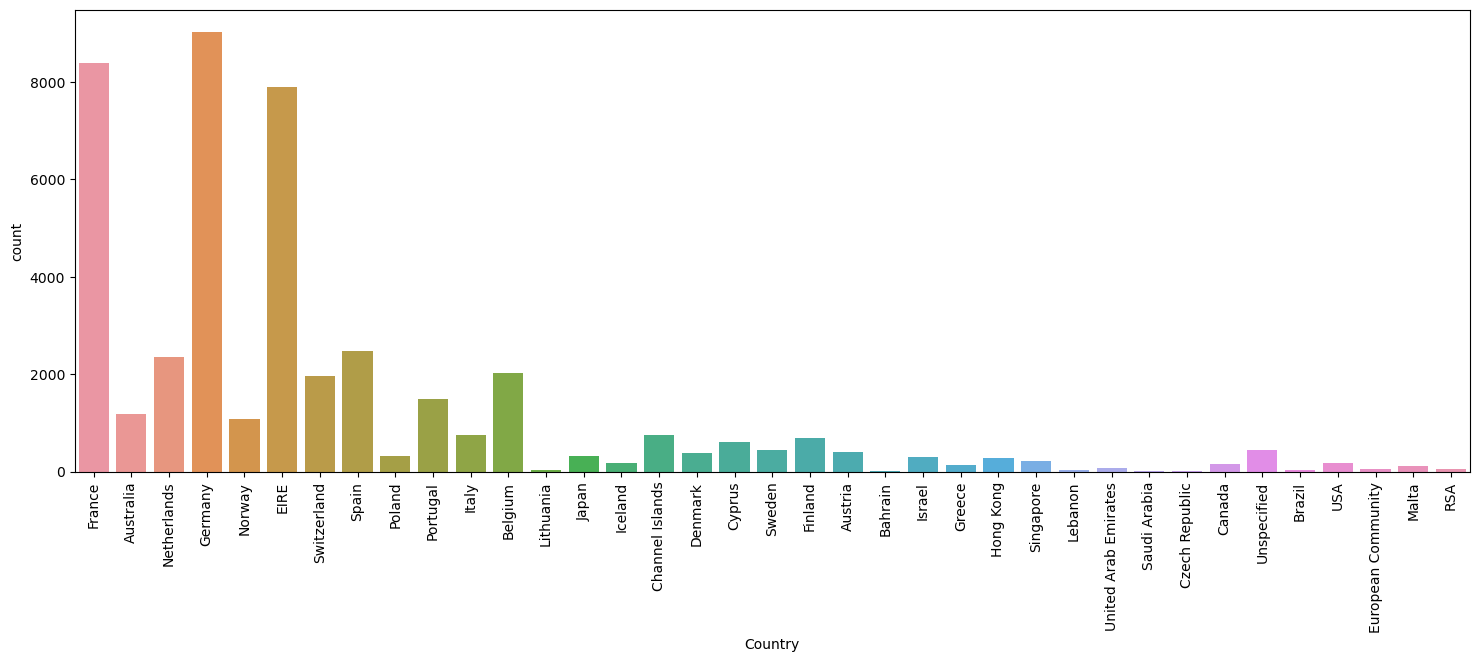

In [181]:
plt.figure(figsize=(18,6))
sns.countplot(x=df3[df3['Country'] != 'United Kingdom']['Country'])
plt.xticks(rotation=90)

In [182]:
uk_count = df3[df3['Country'] == 'United Kingdom']['Country'].count()
all_count = df3['Country'].count()
uk_perc = (uk_count/all_count)
print((uk_perc*100),"%")

91.45301259848515 %


From the above plots and calculations, we can see that the vast majority of sales were made in the UK and just 8.49% went abroad.
We can say our dataset is skewed to the UK side.

<Axes: title={'center': 'Most Customers for country'}, xlabel='Country'>

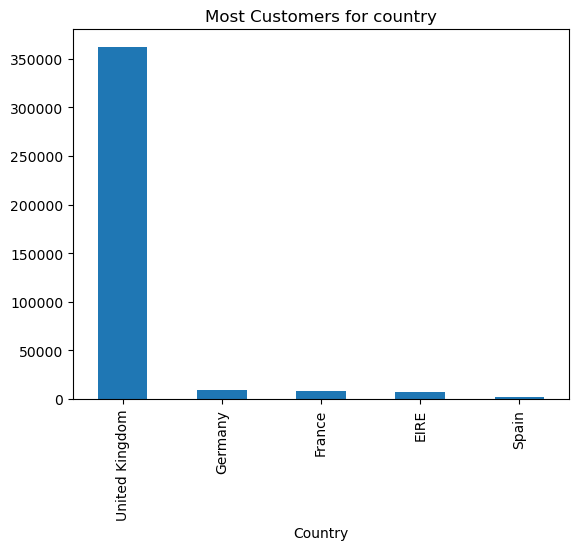

In [183]:
#Countries with more number of customers
cus_id = df.groupby('Country')['CustomerID'].count().sort_values(ascending = False)
cus_id[:5].plot(kind = 'bar', title = 'Most Customers for country')

<Axes: title={'center': 'Least customers for country'}, xlabel='Country'>

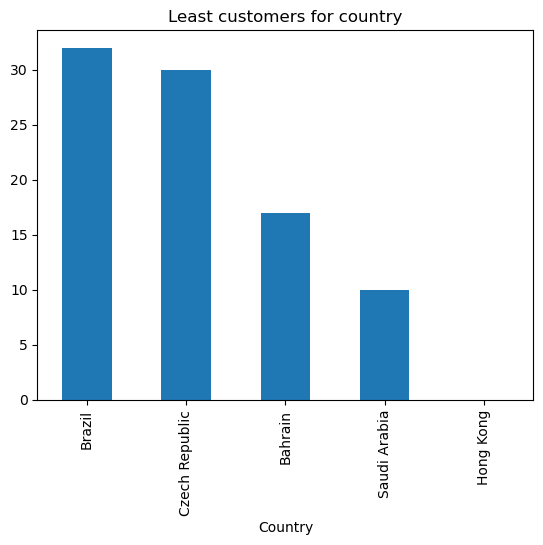

In [184]:
# Countries with less number of customers
cus_id[-5:].plot(kind = 'bar', title = 'Least customers for country')

In [185]:
df3.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'Sales',
       'Description', 'Country', 'InvoiceDate', 'Month', 'Da_Name', 'Year',
       'Time', 'Hour'],
      dtype='object')

In [47]:
#selected_columns = ['Quantity', 'UnitPrice', 'Sales']
#subset_df = df3[[selected_columns]

# Calculate the correlation matrix
#correlation_matrix = selected_columns.corr()

# Display the correlation matrix
#print(correlation_matrix)

In [186]:
#correlation matrix

selected_columns = ['Quantity', 'UnitPrice', 'Sales']
correlation_matrix = df3[selected_columns].corr()
print(correlation_matrix)

           Quantity  UnitPrice     Sales
Quantity   1.000000  -0.003804  0.900415
UnitPrice -0.003804   1.000000  0.137389
Sales      0.900415   0.137389  1.000000


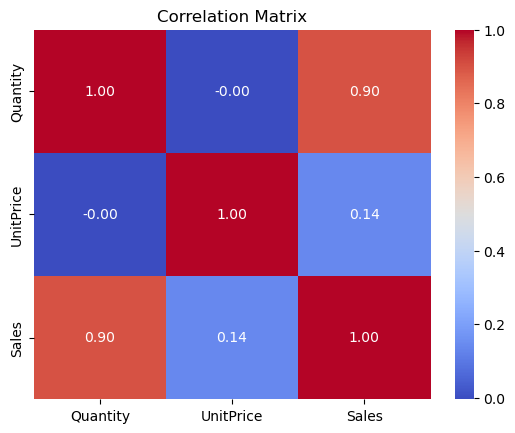

In [188]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Label Encoding

In [189]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df3['CountryEncoded']=le.fit_transform(df3['Country'])
df3['MonthEncoded']=le.fit_transform(df3['Month'])
df3.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,Sales,Description,Country,InvoiceDate,Month,Da_Name,Year,Time,Hour,CountryEncoded,MonthEncoded
0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,2010-12-01 08:26:00,December,Wednesday,2010,08:26:00,8,36,2
1,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,United Kingdom,2010-12-01 08:26:00,December,Wednesday,2010,08:26:00,8,36,2
2,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,United Kingdom,2010-12-01 08:26:00,December,Wednesday,2010,08:26:00,8,36,2
3,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,2010-12-01 08:26:00,December,Wednesday,2010,08:26:00,8,36,2
4,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,2010-12-01 08:26:00,December,Wednesday,2010,08:26:00,8,36,2


In [190]:
#Creating a copy
df4=df3.copy()

In [191]:
#Standard Scaling of numerical data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

selected_columns = ['Quantity', 'UnitPrice','Sales']
x=df4[selected_columns]
scaler.fit(x)

scaled_data = scaler.transform(x)

print(scaled_data)

[[-0.02974001 -0.03792917 -0.01823995]
 [-0.02974001 -0.01464321  0.0003206 ]
 [-0.01703348 -0.03238489  0.0064338 ]
 ...
 [-0.04244654  0.00642504 -0.0134525 ]
 [-0.04244654  0.00642504 -0.0134525 ]
 [-0.0487998   0.02860215 -0.01989714]]


In [54]:
#from numpy import asarray
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()

#selected_columns = ['Quantity', 'UnitPrice','Sales']
#x=df4[selected_columns]
#scaler.fit(x)

#scaled_data = scaler.transform(x)

#print(scaled_data)
#y=pd.DataFrame(scaled_data,columns=['Quantity_sc','UnitPrice_sc','Sales_sc'])
#y.head()

#df4=df4.join(y)
#df4.head()

In [192]:
#Including the scaled data into the main data frame

y=pd.DataFrame(scaled_data,columns=['Quantity_sc','UnitPrice_sc','Sales_sc'])
y.head()

,Quantity_sc,UnitPrice_sc,Sales_sc
0,-0.029740,-0.037929,-0.018240
1,-0.029740,-0.014643,0.000321
2,-0.017033,-0.032385,0.006434
3,-0.029740,-0.014643,0.000321
4,-0.029740,-0.014643,0.000321


In [193]:
y.tail()

,Quantity_sc,UnitPrice_sc,Sales_sc
525455,0.008380,-0.085056,-0.037021
525456,-0.029740,-0.050404,-0.028183
525457,-0.042447,0.006425,-0.013453
525458,-0.042447,0.006425,-0.013453
525459,-0.048800,0.028602,-0.019897


In [194]:
# Concatenate df4 and y along columns (axis=1)
df4 = pd.concat([df4, y], axis=1)

# Display the updated DataFrame
print(df4.head())

  InvoiceNo StockCode  Quantity  UnitPrice  Sales  \
0    536365    85123A       6.0       2.55  15.30   
1    536365     71053       6.0       3.39  20.34   
2    536365    84406B       8.0       2.75  22.00   
3    536365    84029G       6.0       3.39  20.34   
4    536365    84029E       6.0       3.39  20.34   

                           Description         Country         InvoiceDate  \
0   WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom 2010-12-01 08:26:00   
1                  WHITE METAL LANTERN  United Kingdom 2010-12-01 08:26:00   
2       CREAM CUPID HEARTS COAT HANGER  United Kingdom 2010-12-01 08:26:00   
3  KNITTED UNION FLAG HOT WATER BOTTLE  United Kingdom 2010-12-01 08:26:00   
4       RED WOOLLY HOTTIE WHITE HEART.  United Kingdom 2010-12-01 08:26:00   

      Month    Da_Name    Year      Time  Hour  CountryEncoded  MonthEncoded  \
0  December  Wednesday  2010.0  08:26:00   8.0            36.0           2.0   
1  December  Wednesday  2010.0  08:26:00   8.0      

In [195]:
df4

,InvoiceNo,StockCode,Quantity,UnitPrice,Sales,Description,Country,InvoiceDate,Month,Da_Name,Year,Time,Hour,CountryEncoded,MonthEncoded,Quantity_sc,UnitPrice_sc,Sales_sc
0,536365,85123A,6.0,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,2010-12-01 08:26:00,December,Wednesday,2010.0,08:26:00,8.0,36.0,2.0,-0.029740,-0.037929,-0.018240
1,536365,71053,6.0,3.39,20.34,WHITE METAL LANTERN,United Kingdom,2010-12-01 08:26:00,December,Wednesday,2010.0,08:26:00,8.0,36.0,2.0,-0.029740,-0.014643,0.000321
2,536365,84406B,8.0,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,United Kingdom,2010-12-01 08:26:00,December,Wednesday,2010.0,08:26:00,8.0,36.0,2.0,-0.017033,-0.032385,0.006434
3,536365,84029G,6.0,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,2010-12-01 08:26:00,December,Wednesday,2010.0,08:26:00,8.0,36.0,2.0,-0.029740,-0.014643,0.000321
4,536365,84029E,6.0,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,2010-12-01 08:26:00,December,Wednesday,2010.0,08:26:00,8.0,36.0,2.0,-0.029740,-0.014643,0.000321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.023387,0.028879,0.053277
524997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.061506,-0.017415,-0.062469
525398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.061506,-0.050404,-0.066851
525415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008380,-0.068423,-0.010506


In [196]:
df4.isnull().sum()

InvoiceNo         16048
StockCode         16048
Quantity          16048
UnitPrice         16048
Sales             16048
Description       16048
Country           16048
InvoiceDate       16048
Month             16048
Da_Name           16048
Year              16048
Time              16048
Hour              16048
CountryEncoded    16048
MonthEncoded      16048
Quantity_sc       16048
UnitPrice_sc      16048
Sales_sc          16048
dtype: int64

In [197]:
df4.dropna()


,InvoiceNo,StockCode,Quantity,UnitPrice,Sales,Description,Country,InvoiceDate,Month,Da_Name,Year,Time,Hour,CountryEncoded,MonthEncoded,Quantity_sc,UnitPrice_sc,Sales_sc
0,536365,85123A,6.0,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,2010-12-01 08:26:00,December,Wednesday,2010.0,08:26:00,8.0,36.0,2.0,-0.029740,-0.037929,-0.018240
1,536365,71053,6.0,3.39,20.34,WHITE METAL LANTERN,United Kingdom,2010-12-01 08:26:00,December,Wednesday,2010.0,08:26:00,8.0,36.0,2.0,-0.029740,-0.014643,0.000321
2,536365,84406B,8.0,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,United Kingdom,2010-12-01 08:26:00,December,Wednesday,2010.0,08:26:00,8.0,36.0,2.0,-0.017033,-0.032385,0.006434
3,536365,84029G,6.0,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,2010-12-01 08:26:00,December,Wednesday,2010.0,08:26:00,8.0,36.0,2.0,-0.029740,-0.014643,0.000321
4,536365,84029E,6.0,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,2010-12-01 08:26:00,December,Wednesday,2010.0,08:26:00,8.0,36.0,2.0,-0.029740,-0.014643,0.000321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525455,580632,21212,3.0,0.55,1.65,PACK OF 72 RETROSPOT CAKE CASES,United Kingdom,2011-12-05 12:16:00,December,Monday,2011.0,12:16:00,12.0,36.0,2.0,0.008380,-0.085056,-0.037021
525456,580632,23309,3.0,0.55,1.65,SET OF 60 I LOVE LONDON CAKE CASES,United Kingdom,2011-12-05 12:16:00,December,Monday,2011.0,12:16:00,12.0,36.0,2.0,-0.029740,-0.050404,-0.028183
525457,580632,22835,1.0,4.95,4.95,HOT WATER BOTTLE I AM SO POORLY,United Kingdom,2011-12-05 12:16:00,December,Monday,2011.0,12:16:00,12.0,36.0,2.0,-0.042447,0.006425,-0.013453
525458,580632,22114,1.0,4.25,4.25,HOT WATER BOTTLE TEA AND SYMPATHY,United Kingdom,2011-12-05 12:16:00,December,Monday,2011.0,12:16:00,12.0,36.0,2.0,-0.042447,0.006425,-0.013453


In [198]:
df4.tail()

,InvoiceNo,StockCode,Quantity,UnitPrice,Sales,Description,Country,InvoiceDate,Month,Da_Name,Year,Time,Hour,CountryEncoded,MonthEncoded,Quantity_sc,UnitPrice_sc,Sales_sc
524976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.023387,0.028879,0.053277
524997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.061506,-0.017415,-0.062469
525398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.061506,-0.050404,-0.066851
525415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008380,-0.068423,-0.010506
525454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.042447,0.006425,-0.013453


In [199]:
df4 = df4.dropna(how='all')
df4.isnull().sum()

InvoiceNo         16048
StockCode         16048
Quantity          16048
UnitPrice         16048
Sales             16048
Description       16048
Country           16048
InvoiceDate       16048
Month             16048
Da_Name           16048
Year              16048
Time              16048
Hour              16048
CountryEncoded    16048
MonthEncoded      16048
Quantity_sc       16048
UnitPrice_sc      16048
Sales_sc          16048
dtype: int64

In [200]:
df4 = df4.iloc[:-16048]
df4.isnull().sum()
df4["Quantity_sc"].tail()

541904   NaN
541905   NaN
541906   NaN
541907   NaN
541908   NaN
Name: Quantity_sc, dtype: float64

In [201]:
df5=df4.copy()
df5.tail()

,InvoiceNo,StockCode,Quantity,UnitPrice,Sales,Description,Country,InvoiceDate,Month,Da_Name,Year,Time,Hour,CountryEncoded,MonthEncoded,Quantity_sc,UnitPrice_sc,Sales_sc
541904,581587,22613,12.0,0.85,10.20,PACK OF 20 SPACEBOY NAPKINS,France,2011-12-09 12:50:00,December,Friday,2011.0,12:50:00,12.0,13.0,2.0,NaN,NaN,NaN
541905,581587,22899,6.0,2.10,12.60,CHILDREN'S APRON DOLLY GIRL,France,2011-12-09 12:50:00,December,Friday,2011.0,12:50:00,12.0,13.0,2.0,NaN,NaN,NaN
541906,581587,23254,4.0,4.15,16.60,CHILDRENS CUTLERY DOLLY GIRL,France,2011-12-09 12:50:00,December,Friday,2011.0,12:50:00,12.0,13.0,2.0,NaN,NaN,NaN
541907,581587,23255,4.0,4.15,16.60,CHILDRENS CUTLERY CIRCUS PARADE,France,2011-12-09 12:50:00,December,Friday,2011.0,12:50:00,12.0,13.0,2.0,NaN,NaN,NaN
541908,581587,22138,3.0,4.95,14.85,BAKING SET 9 PIECE RETROSPOT,France,2011-12-09 12:50:00,December,Friday,2011.0,12:50:00,12.0,13.0,2.0,NaN,NaN,NaN


In [202]:
df5.drop(columns=['InvoiceNo','StockCode','Quantity', 'UnitPrice', 'Sales',
       'Description', 'Country', 'InvoiceDate', 'Month', 'Da_Name', 'Year',
       'Time', 'Hour'],inplace=True,axis=1)
df5

,CountryEncoded,MonthEncoded,Quantity_sc,UnitPrice_sc,Sales_sc
0,36.0,2.0,-0.029740,-0.037929,-0.018240
1,36.0,2.0,-0.029740,-0.014643,0.000321
2,36.0,2.0,-0.017033,-0.032385,0.006434
3,36.0,2.0,-0.029740,-0.014643,0.000321
4,36.0,2.0,-0.029740,-0.014643,0.000321
...,...,...,...,...,...
541904,13.0,2.0,NaN,NaN,NaN
541905,13.0,2.0,NaN,NaN,NaN
541906,13.0,2.0,NaN,NaN,NaN
541907,13.0,2.0,NaN,NaN,NaN


In [203]:
df5 = df5.iloc[:-16048]
df5.isna().sum()

CountryEncoded    0
MonthEncoded      0
Quantity_sc       0
UnitPrice_sc      0
Sales_sc          0
dtype: int64

In [71]:
#df5.dropna(subset="Sales_sc",axis=0,inplace=True)
#df5.dropna(subset="CountryEncoded ",axis=0,inplace=True)
#df5.dropna(subset="MonthEncoded ",axis=0,inplace=True)


# Decison Tree

In [204]:
from sklearn.model_selection import train_test_split

y=df5['CountryEncoded']
x = df5[['Quantity_sc','UnitPrice_sc','Sales_sc' ,'MonthEncoded']]

In [205]:
#Dividing the Dataset into training and testing

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y) #70% training part

In [206]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [207]:
ct = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [208]:
ct.fit(X_train,y_train)

DecisionTreeClassifier()

In [209]:
y_pred = ct.predict(X_test)

In [210]:
confusion_matrix(y_test, y_pred)

array([[     2,      0,      0, ...,      0,    350,      0],
       [     0,      1,      0, ...,      0,    113,      0],
       [     0,      0,      0, ...,      0,      5,      0],
       ...,
       [     0,      0,      0, ...,      0,     20,      0],
       [    28,      8,      0, ...,      0, 139009,      2],
       [     0,      0,      0, ...,      0,    132,      0]], dtype=int64)

In [211]:
accuracy_score(y_test, y_pred)

0.9102235251007695

In [212]:
precision_score(y_test, y_pred,average='weighted')

C:\Users\soupa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8451588579748519

In [213]:
recall_score(y_test, y_pred,average='weighted')

0.9102235251007695

In [214]:
f1_score(y_test, y_pred,average='weighted')

0.8722885774103815

In [215]:
X_train.columns

Index(['Quantity_sc', 'UnitPrice_sc', 'Sales_sc', 'MonthEncoded'], dtype='object')

In [216]:
class_names = df5['CountryEncoded'].unique().astype(str).tolist()

[Text(0.5, 0.875, 'node #0\nMonthEncoded <= 9.5\ngini = 0.164\nsamples = 356588\nvalue = [829, 274, 13, 1375, 22, 106, 523, 422, 18, 258\n5351, 42, 480, 5755, 6162, 76, 196, 120, 204, 525\n225, 32, 25, 78, 1594, 699, 231, 1017, 41, 6, 155\n1691, 314, 1371, 125, 48, 325876, 309]\nclass = 23.0'),
 Text(0.25, 0.625, 'node #1\nMonthEncoded <= 0.5\ngini = 0.158\nsamples = 281315\nvalue = [677, 236, 13, 1063, 22, 106, 404, 305, 11, 205\n3931, 42, 367, 4419, 4703, 76, 175, 84, 156, 401\n210, 32, 25, 78, 1231, 473, 208, 667, 0, 6, 137\n1305, 250, 966, 39, 20, 258008, 264]\nclass = 23.0'),
 Text(0.125, 0.375, 'node #2\nSales_sc <= -0.047\ngini = 0.122\nsamples = 20105\nvalue = [14, 18, 0, 90, 22, 0, 4, 0, 0, 0, 196, 10, 21\n161, 313, 24, 23, 20, 3, 20, 35, 0, 0, 0, 17\n0, 15, 55, 0, 0, 39, 64, 22, 60, 15, 0, 18835\n9]\nclass = 23.0'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'node #1171\nMonthEncoded <= 1.5\ngini = 0.161\nsamples = 261210

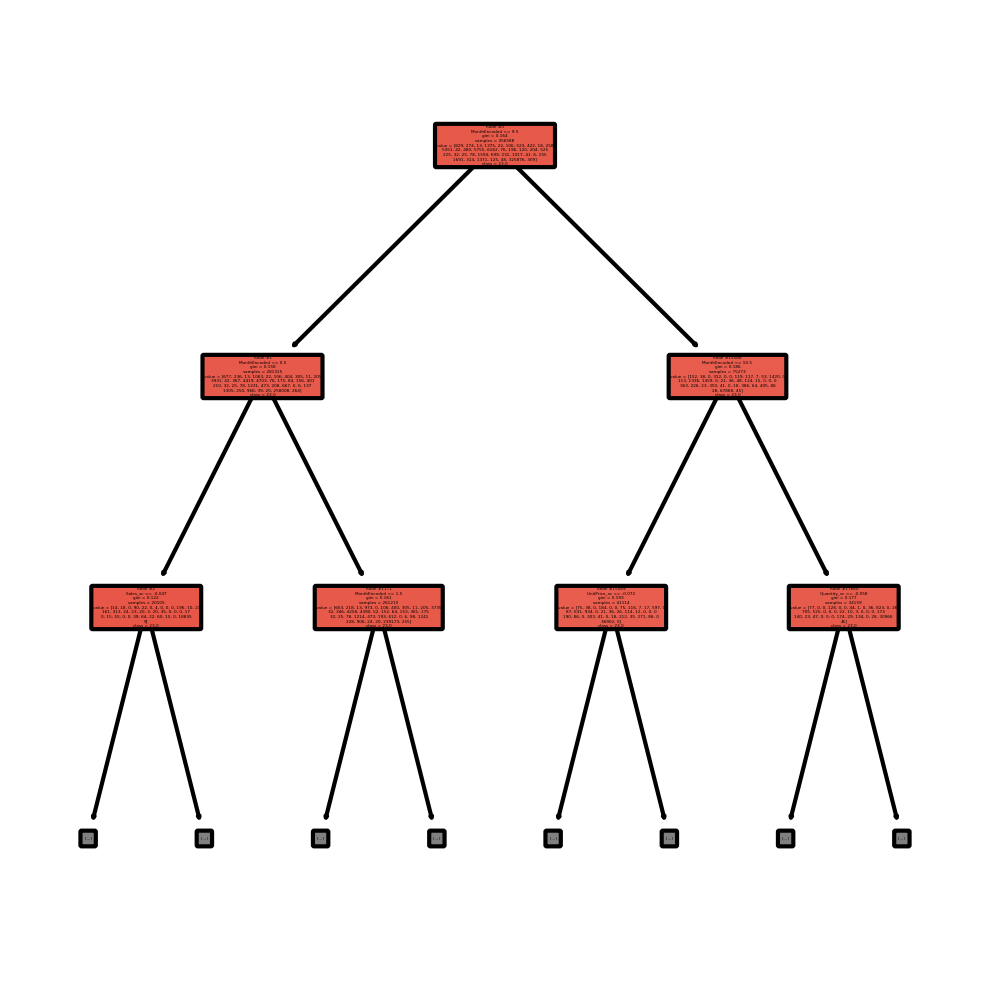

In [217]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(ct, max_depth = 2,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['Quantity_sc','UnitPrice_sc','Sales_sc' ,'MonthEncoded'],
            class_names = class_names)

# RANDOM FOREST

In [218]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf1=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(X_train,y_train)

y_pred1=clf1.predict(X_test)

In [219]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.9126576977438099


In [220]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred1)

array([[     1,      0,      0, ...,      0,    352,      0],
       [     0,      0,      0, ...,      0,    114,      0],
       [     0,      0,      0, ...,      0,      5,      0],
       ...,
       [     0,      0,      0, ...,      0,     20,      0],
       [    14,      3,      0, ...,      0, 139395,      2],
       [     0,      0,      0, ...,      0,    133,      0]], dtype=int64)

In [221]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.07      0.00      0.01       355
         1.0       0.00      0.00      0.00       117
         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00       589
         4.0       0.00      0.00      0.00        10
         5.0       0.00      0.00      0.00        45
         6.0       0.00      0.00      0.00       224
         7.0       0.40      0.01      0.02       181
         8.0       0.00      0.00      0.00         7
         9.0       0.00      0.00      0.00       111
        10.0       0.12      0.00      0.00      2294
        11.0       0.00      0.00      0.00        18
        12.0       0.11      0.00      0.01       205
        13.0       0.39      0.01      0.03      2467
        14.0       0.17      0.00      0.01      2641
        15.0       0.00      0.00      0.00        33
        16.0       0.00      0.00      0.00        84
        17.0       0.00    

C:\Users\soupa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\soupa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\soupa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [222]:
print ("Precision ", precision_score(y_test, y_pred1,average='weighted'))
print ("Recall ",recall_score(y_test, y_pred1,average='weighted'))
print ("F1 Score ",f1_score(y_test, y_pred1,average='weighted'))

Precision  0.8514102207912766
Recall  0.9126576977438099
F1 Score  0.8732466075535842


C:\Users\soupa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [223]:
import pandas as pd
feature_imp = pd.Series(clf1.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Sales_sc        0.409242
UnitPrice_sc    0.316539
Quantity_sc     0.167539
MonthEncoded    0.106680
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


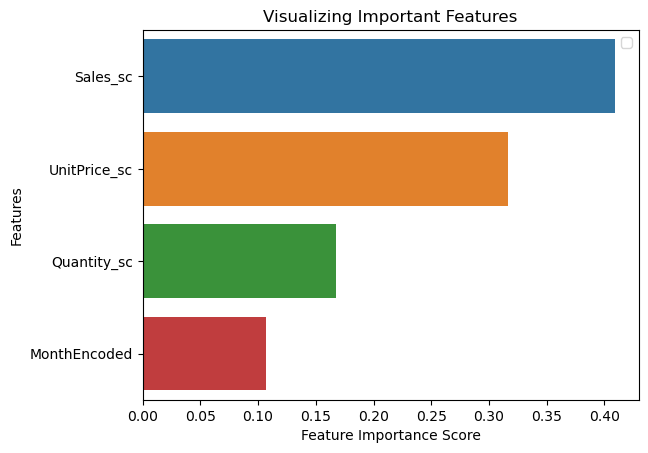

In [224]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

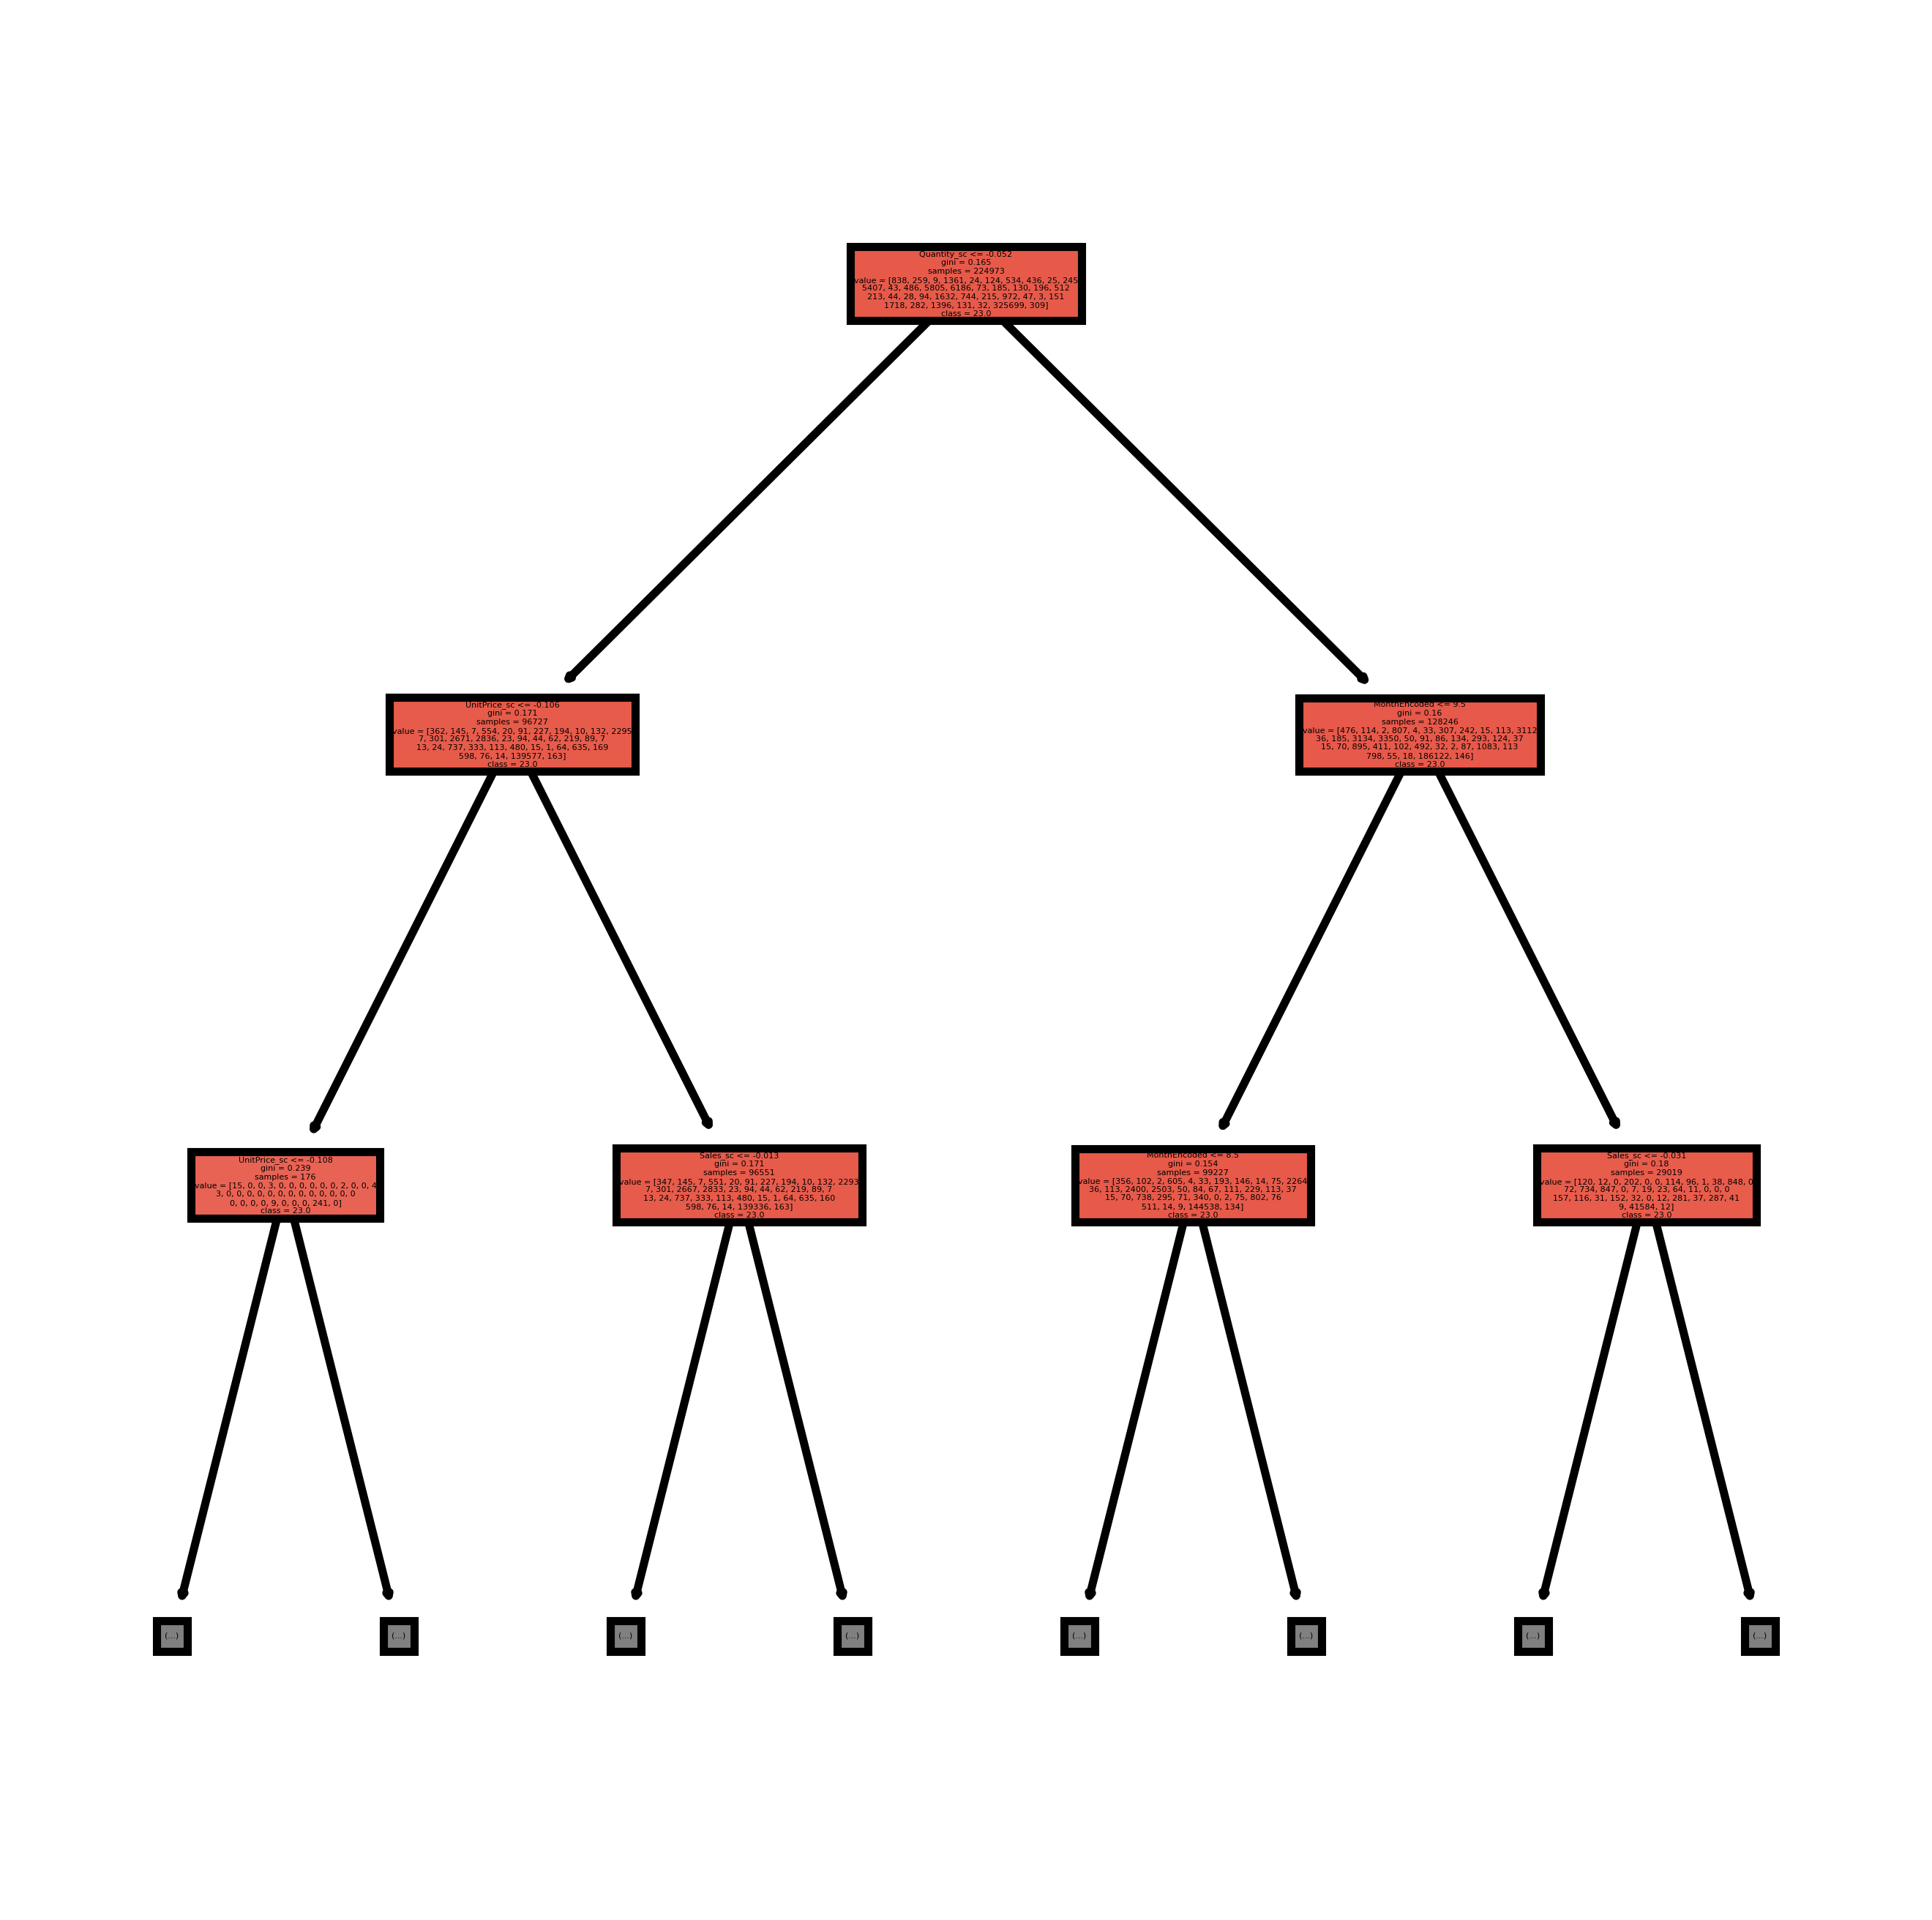

In [225]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf1.estimators_[0],
               max_depth=2,
               feature_names = ['Quantity_sc','UnitPrice_sc','Sales_sc' ,'MonthEncoded'], 
               class_names=class_names ,
               filled = True);

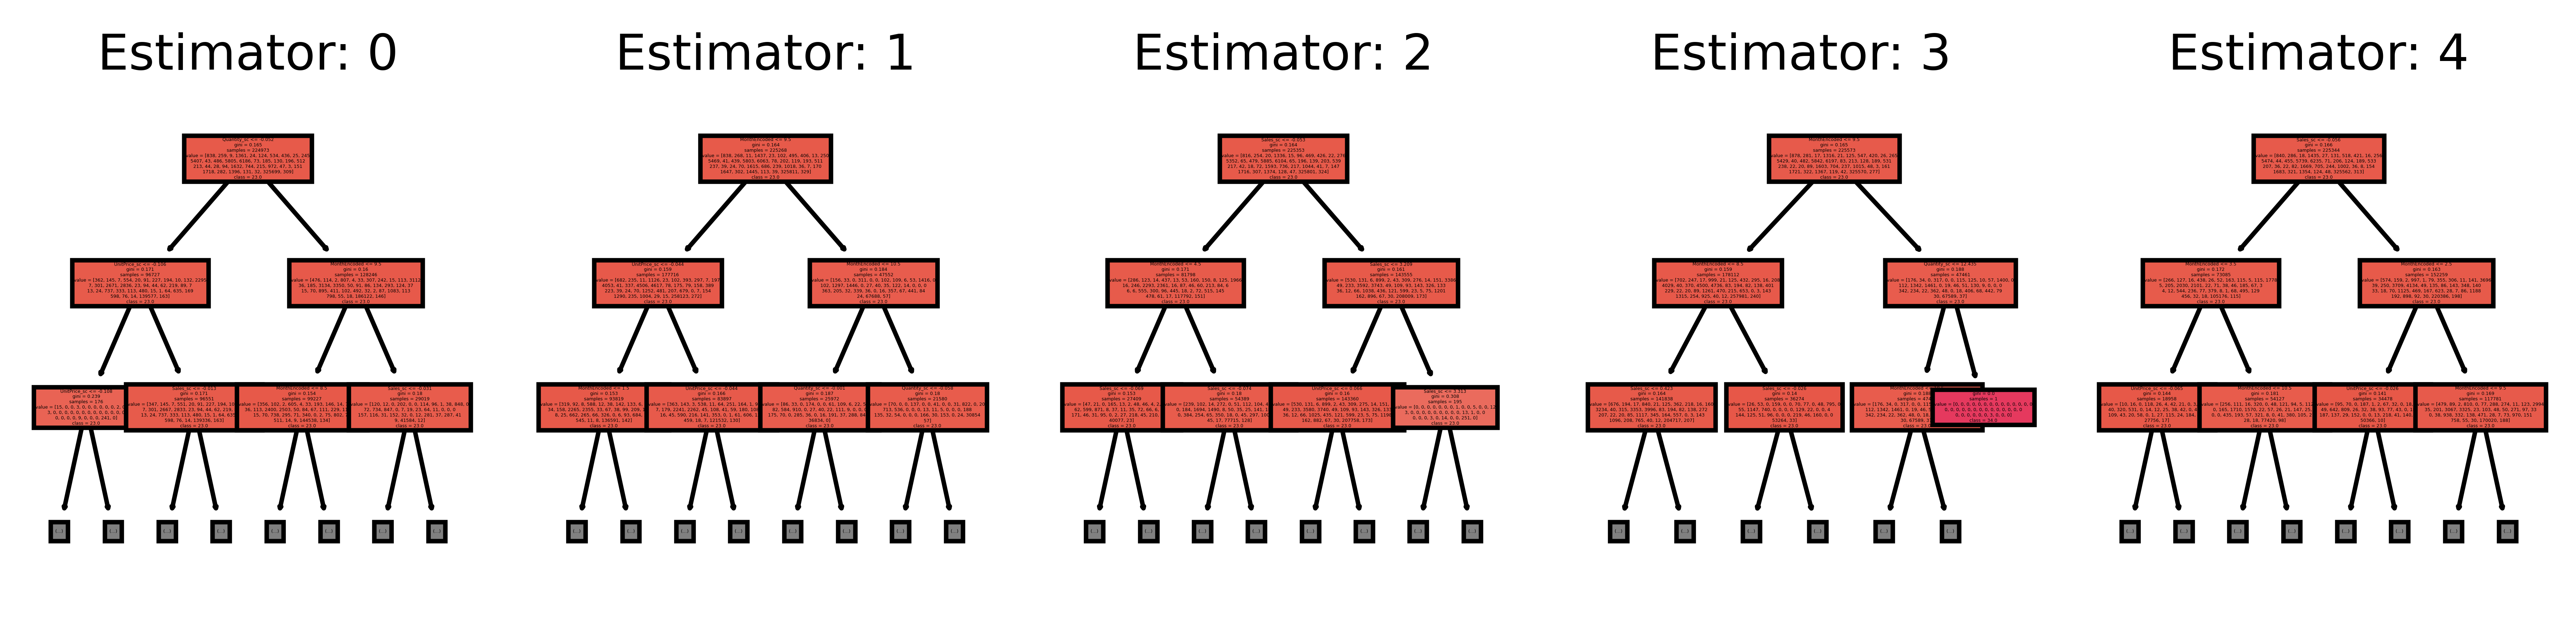

In [226]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(clf1.estimators_[index],
                   max_depth=2,
                   feature_names = ['Quantity_sc','UnitPrice_sc','Sales_sc' ,'MonthEncoded'], 
                   class_names=class_names,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

# KNN

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
y = df5['CountryEncoded']
x = df5[['Quantity_sc','UnitPrice_sc','Sales_sc' ,'MonthEncoded']]
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [228]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [229]:
y_pred = knn.predict(X_test)

In [231]:
confusion_matrix(y_test, y_pred)

array([[     2,      0,      0, ...,      0,    352,      0],
       [     0,      0,      0, ...,      0,    116,      0],
       [     0,      0,      0, ...,      0,      5,      0],
       ...,
       [     0,      0,      0, ...,      0,     20,      0],
       [    13,      3,      0, ...,      0, 139189,      0],
       [     0,      0,      0, ...,      0,    133,      0]], dtype=int64)

In [232]:
from sklearn.metrics import accuracy_score

In [233]:
accuracy_score(y_test, y_pred)

0.9111723289535675

In [234]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred,average='weighted')

C:\Users\soupa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8467942730123476

In [235]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred,average='weighted')

0.9111723289535675

In [236]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,average='weighted')

0.8723003690097539

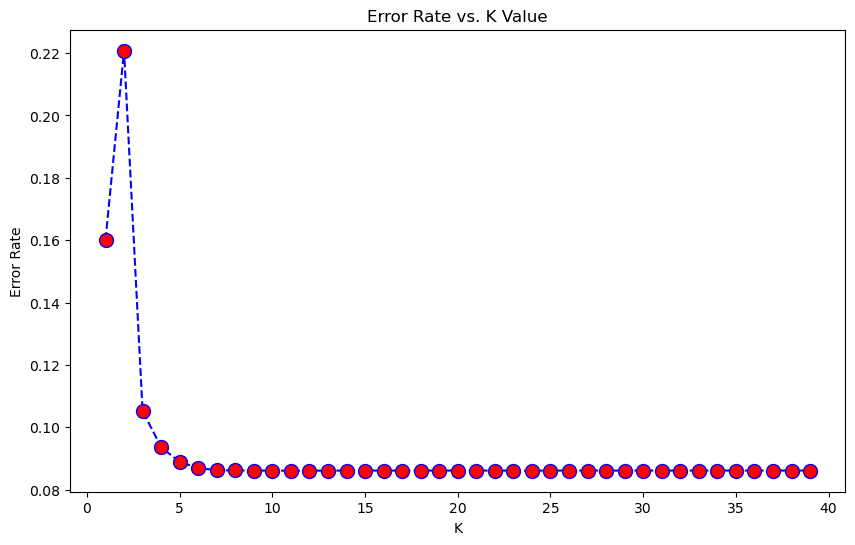

Minimum error:- 0.08607286813589488 at K = 11


In [124]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [125]:
knn1 = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
knn1.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [126]:
y_pred1 = knn1.predict(X_test)

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.9139271318641051

# XGBOOST

In [128]:
#Import XGBoost
!pip install xgboost
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

In [129]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [130]:
y_pred = model.predict(X_test)

In [131]:
accuracy_score(y_test, y_pred)

0.9139205883892583

In [132]:
precision_score(y_test, y_pred,average='weighted')

C:\Users\soupa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8695853606456525

In [237]:
recall_score(y_test, y_pred,average='weighted')

0.9111723289535675

In [238]:
f1_score(y_test, y_pred,average='weighted')

0.8723003690097539

In [239]:
X_train.columns

Index(['Quantity_sc', 'UnitPrice_sc', 'Sales_sc', 'MonthEncoded'], dtype='object')

In [240]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingClassifier
# Instantiate Gradient Boosting Regressor
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )

In [241]:
feature_imp = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

MonthEncoded    0.371458
Quantity_sc     0.226686
Sales_sc        0.201403
UnitPrice_sc    0.200453
dtype: float32

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


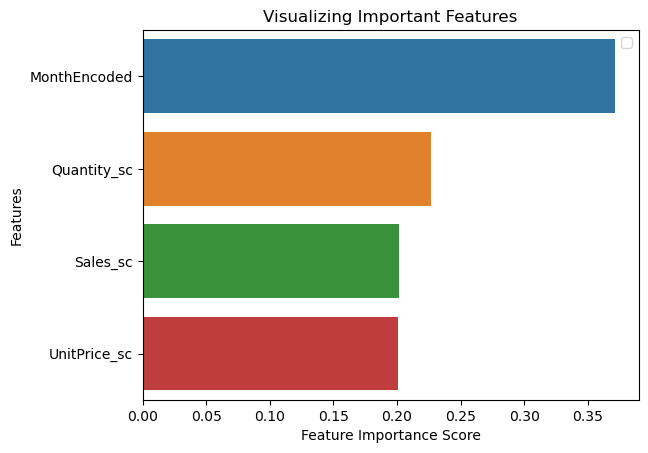

In [242]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

F1 Score of the models are listed below:
    kNN:0.8723003690097539
    Decison Tree:0.8732466075535842
    Random Forest:0.8722885774103815
    XGBoost:0.8723003690097539

# Interpretation based on Comparing the Evaluation Parameters of Different Models

F1 Score: F1 score is the harmonic mean of precision and recall. It is a good metric for imbalanced datasets. The higher the F1 score, the better.

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It indicates how many of the predicted positive instances are actually positive. Higher precision values are desirable.

Accuracy: Accuracy is the ratio of correctly predicted observations to the total observations. It provides an overall measure of how well the model is performing. High accuracy is generally desirable, but it might not be the best metric for imbalanced datasets.

Recall: Recall is the ratio of correctly predicted positive observations to all actual positives. It is also known as sensitivity or true positive rate. Higher recall values are desirable, especially in scenarios where missing positive instances is costly.

Test Name	F1 Score	Precison	Accuracy	Recall
kNN	0.87230036	0.846794273	0.911172329	0.91117232
Decision Tree	0.87228857	0.845158858	0.91022352	0.910223525
Random Forest	0.873246608	0.85141022	0.912657698	0.91265769
XGBoost	0.872300369	0.86958536	0.913920588	0.91117232

Based on the provided results:

All models have relatively high F1 scores, precision, accuracy, and recall.
The Random Forest model has the highest F1 score, precision, accuracy, and recall.

# Recommendation:

Considering the provided metrics, the Random Forest model appears to be the best-performing model among the ones evaluated.